In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Datetime
import datetime as dt

#Sklearn
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures,power_transform
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

#Statsmodels
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
holidays = pd.read_excel("Events_HolidaysData.xlsx")
holidays.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [4]:
print(holidays.shape)

(150, 4)


In [5]:
macro_economic = pd.read_excel("macro_economic.xlsx")
macro_economic.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [6]:
weather09 = pd.read_excel('WeatherData.xlsx',sheet_name='2009')
weather10 = pd.read_excel('WeatherData.xlsx',sheet_name='2010')
weather11 = pd.read_excel('WeatherData.xlsx',sheet_name='2011')
weather12 = pd.read_excel('WeatherData.xlsx',sheet_name='2012')
weather13 = pd.read_excel('WeatherData.xlsx',sheet_name='2013')

#Output year
weather14 = pd.read_excel('WeatherData.xlsx',sheet_name='2014')

In [7]:
sales = pd.read_csv('train.csv')
sales.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


# Data Preparation of Macro_economic data

In [8]:
macro_economic.insert(loc=0,column='Year',value=macro_economic['Year-Month'].str.split(expand=True)[0].astype('int64'))
macro_economic.insert(loc=1,column='Month',value=macro_economic['Year-Month'].str.split(expand=True)[2])

In [9]:
macro_economic.drop('Year-Month',axis=1,inplace=True)

In [10]:
macro_economic.drop('PartyInPower',axis=1,inplace=True)

In [11]:
macro_economic.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1, inplace=True)

In [12]:
macro_economic

,Year,Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009,Jan,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
1,2009,Feb,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2,2009,Mar,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
3,2009,Apr,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
4,2009,May,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016,Aug,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
92,2016,Sep,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
93,2016,Oct,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425
94,2016,Nov,18960.461568,16910.896330,265.203,4.6,12.41,9.45,25.87,78.92,0.51,9.950,9.464,791,15.600,3.475,11.425


In [13]:
macro_economic['Month'].unique()
macro_economic['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12},inplace=True)

In [14]:
# 5 years
economic09_13 = macro_economic[macro_economic['Year'].between(2009,2013)]
print(economic09_13.head(2)['Year'])
print(economic09_13.tail(2)['Year'])


# 1 year 2014 (Output)
economic14 = macro_economic[macro_economic['Year']==2014]

0    2009
1    2009
Name: Year, dtype: int64
58    2013
59    2013
Name: Year, dtype: int64


# Data Preparation for weather patterns dataset

In [15]:
weather09['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
temp = weather09.groupby(['Year','Month']).median().reset_index()
we09 = pd.merge(left=temp,right=weather09.groupby(['Month']).count()['WeatherEvent'].reset_index(), how='inner',on='Month')

In [16]:
for i in weather12.columns:
    weather12.loc[:,i].replace({'-':-1},inplace=True)
for i in weather13.columns:
    weather13.loc[:,i].replace({'-':-1},inplace=True)
for i in weather14.columns:
    weather14.loc[:,i].replace({'-':-1},inplace=True)
for i in weather14.columns:
    weather14.loc[:,i].replace({'-':-1},inplace=True)

In [17]:
weather09.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather09.iloc[:,-2].fillna(weather09.iloc[:,-2].mean(),inplace=True)

weather10.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather10.iloc[:,-2].fillna(weather10.iloc[:,-2].mean(),inplace=True)

weather11.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather11.iloc[:,-2].fillna(weather11.iloc[:,-2].mean(),inplace=True)

weather12.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather12.iloc[:,-2].fillna(weather12.iloc[:,-2].mean(),inplace=True)

weather13.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather13.iloc[:,-2].fillna(weather13.iloc[:,-2].mean(),inplace=True)

weather14.iloc[:,-2].replace({'T':np.nan},inplace=True)
weather14.iloc[:,-2].fillna(weather14.iloc[:,-2].mean(),inplace=True)

In [18]:
weather14['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)

In [19]:
yt= 2010
for number in range(10,15):
    vars()['weather'+str(number)]['Year'] = yt
    yt += 1
    vars()['weather'+str(number)]['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
    temp = vars()['weather'+str(number)].groupby(['Year','Month']).median().reset_index()
    vars()['we'+str(number)] = pd.merge(left=temp,right=vars()['weather'+str(number)].groupby(['Month']).count()['WeatherEvent'].reset_index(), how='inner',on='Month')

In [20]:
we09.shape,we10.shape,we11.shape,we12.shape,we13.shape,

((12, 19), (12, 22), (12, 22), (12, 23), (12, 23))

In [21]:
we14.iloc[:,[0,1,2,4,7,10,16,-1]].columns
#Using these columns only

Index(['Year', 'Month', 'Day', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent'],
      dtype='object')

In [22]:
w09 = we09.iloc[:,[0,1,2,4,7,10,16,-1]]
for i in range(10,14):
    vars()['w'+str(i)] = vars()['we'+str(i)].iloc[:,[0,1,2,4,7,10,16,-1]]

In [23]:
weather5yrs = w09.append([w10,w11,w12,w13],ignore_index=True)
weather5yrs.head()

,Year,Month,Day,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Visibility (km) avg,WeatherEvent
0,2009,1,16.0,-2.0,-10.0,54.0,16.0,10
1,2009,2,14.5,3.0,-6.5,50.0,16.0,6
2,2009,3,16.0,7.0,-1.0,56.0,16.0,10
3,2009,4,15.5,11.5,2.5,54.5,16.0,12
4,2009,5,16.0,17.0,11.0,69.0,15.0,14


In [24]:
weather5yrs.shape

(60, 8)

In [25]:
weather1yr = we14.iloc[:,[0,1,2,4,7,10,16,-1]]
weather1yr.shape

(12, 8)

# Data Preparation of holidays data

In [26]:
holidays

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event
...,...,...,...,...
145,2016,2024-11-01,Thanksgiving Day,Federal Holiday
146,2016,2024-12-01,Christmas Eve,Event
147,2016,2025-12-01,Christmas Day,Federal Holiday
148,2016,2026-12-01,'Christmas Day' observed,Federal Holiday


In [27]:
holidays['Month'] = holidays['MonthDate'].dt.month
holidays

,Year,MonthDate,Event,DayCategory,Month
0,2009,2001-01-01,New Year's Day,Federal Holiday,1
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday,1
2,2009,2014-02-01,Valentine's Day,Event,2
3,2009,2016-02-01,Presidents' Day,Federal Holiday,2
4,2009,2012-04-01,Easter Sunday,Event,4
...,...,...,...,...,...
145,2016,2024-11-01,Thanksgiving Day,Federal Holiday,11
146,2016,2024-12-01,Christmas Eve,Event,12
147,2016,2025-12-01,Christmas Day,Federal Holiday,12
148,2016,2026-12-01,'Christmas Day' observed,Federal Holiday,12


In [28]:
holidays['Event'].unique()

array(["New Year's Day", 'Martin Luther King Jr. Day', "Valentine's Day",
       "Presidents' Day", 'Easter Sunday', "Mother's Day", 'Memorial Day',
       "Father's Day", "'Independence Day' observed", 'Independence Day',
       'Labor Day', 'Columbus Day (Most regions)', 'Halloween',
       'Veterans Day', 'Thanksgiving Day', 'Christmas Eve',
       'Christmas Day', "New Year's Eve", "'Christmas Day' observed",
       "'New Year's Day' observed", 'Election Day',
       "Thomas Jefferson's Birthday", 'Day After Christmas Day'],
      dtype=object)

In [30]:
temp = holidays.groupby(['Year','Month']).count()['Event'].reset_index()
temp914 = temp[temp['Year'].between(2009,2014)]
temp914.head(2)

,Year,Month,Event
0,2009,1,2
1,2009,2,2


In [331]:
len(temp914)

60

In [31]:
#Encoding missing Months holidays
for i in range(2009,2015):
    temp914=temp914.append(other={'Year':i, 'Month':3,'Event': 0},ignore_index=True)
    temp914=temp914.append(other={'Year':i, 'Month':8,'Event': 0},ignore_index=True)
temp914.sort_values(by=['Year','Month'],ignore_index=True,inplace=True)
len(temp914)

72

In [32]:
holiday9_13 = temp914[temp914['Year'].between(2009,2013)]
holiday14 = temp914[temp914['Year']==2014]

In [33]:
holiday9_13.shape, holiday14.shape

((60, 3), (12, 3))

# Merging of DATAFRAMES

In [34]:
#Matching Granularity
sales.shape

(180, 4)

In [35]:
sales.head(2)

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0


In [36]:
train = pd.read_csv("submission.csv")
train.shape

(36, 5)

In [37]:
#train['ProductCategory'].replace({'MenClothing':1,'OtherClothing':2,'WomenClothing':3},inplace=True)
test = train.drop(['Unnamed: 3','Sales(In ThousandDollars)'],axis=1)
test.head()

,Year,Month,ProductCategory
0,2014,1,WomenClothing
1,2014,1,MenClothing
2,2014,1,OtherClothing
3,2014,2,WomenClothing
4,2014,2,MenClothing


In [38]:
holiday14.shape,weather1yr.shape,economic14.shape

((12, 3), (12, 8), (12, 17))

In [39]:
#YEAR 14

#holidays and sales
merge14_1 = pd.merge(left=test,right=holiday14,how='inner',left_on=['Year','Month'],right_on=['Year','Month'])

#holiday,sales and Weather
merge14_2 = pd.merge(left=merge14_1, right=weather1yr, how='inner')

#holiday,sales, Weather and macroeconomic
merge14_3 = pd.merge(left=merge14_2, right=economic14, how='inner')

In [40]:
sales_data_14 = merge14_3.copy()

In [41]:
sales_data_14['Year'].replace({2014:6},inplace=True)
#s14 = pd.get_dummies(data=sales_data_14, columns=['ProductCategory'])

In [42]:
holiday9_13.shape,weather5yrs.shape,economic09_13.shape

((60, 3), (60, 8), (60, 17))

In [43]:
sales_data_14.shape

(36, 25)

In [44]:
#YEAR 09 - 13


#holidays and sales
merge1 = pd.merge(left=sales,right=holiday9_13,how='inner',left_on=['Year','Month'],right_on=['Year','Month'])

#holiday,sales and Weather
merge2 = pd.merge(left=merge1, right=weather5yrs, how='inner')

#holiday,sales, Weather and macroeconomic
merge3 = pd.merge(left=merge2, right=economic09_13, how='inner')

In [45]:
sales_data_09_13 = merge3.copy()

In [46]:
sales_data_09_13.isnull().sum()

Year                                                                  0
Month                                                                 0
ProductCategory                                                       0
Sales(In ThousandDollars)                                            10
Event                                                                 0
Day                                                                   0
Temp avg (°C)                                                         0
Dew Point avg (°C)                                                    0
Humidity (%) avg                                                      0
Visibility (km) avg                                                   0
WeatherEvent                                                          0
Monthly Nominal GDP Index (inMillion$)                                0
Monthly Real GDP Index (inMillion$)                                   0
CPI                                                             

In [47]:
#Dropping nan Values---Nan in sales (Output feature itself)
sales_data_09_13.dropna(inplace=True)

In [48]:
sales_data_09_13.columns

Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)',
       'Event', 'Day', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent',
       'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

In [49]:
sales_data_09_13['Year'].replace({2009:1,2010:2,2011:3, 2012:4, 2013:5},inplace=True)

In [51]:
sales['ProductCategory'].unique()

array(['WomenClothing', 'MenClothing', 'OtherClothing'], dtype=object)

# MODEL II ---> Creating separate Models for Product Categories

In [55]:
#5yrs data
sales_913_Women = sales_data_09_13[sales_data_09_13['ProductCategory']=='WomenClothing']
sales_913_Men = sales_data_09_13[sales_data_09_13['ProductCategory']=='MenClothing']
sales_913_Other = sales_data_09_13[sales_data_09_13['ProductCategory']=='OtherClothing']

#1yrs data
sales_14_Women = sales_data_14[sales_data_14['ProductCategory']=='WomenClothing']
sales_14_Men = sales_data_14[sales_data_14['ProductCategory']=='MenClothing']
sales_14_Other = sales_data_14[sales_data_14['ProductCategory']=='OtherClothing']

In [59]:
#The column dimensionality must be same
print(sales_913_Men.shape,sales_913_Other.shape,sales_913_Women.shape)
print(sales_14_Men.shape,sales_14_Other.shape,sales_14_Women.shape)

(57, 26) (56, 26) (57, 26)
(12, 25) (12, 25) (12, 25)


In [95]:
#5yr ----
Xmen = sales_913_Men.drop(['Sales(In ThousandDollars)','ProductCategory','Day'],axis=1)
ymen = sales_913_Men['Sales(In ThousandDollars)']

Xwomen = sales_913_Women.drop(['Sales(In ThousandDollars)','ProductCategory','Day'],axis=1)
ywomen = sales_913_Women['Sales(In ThousandDollars)']

Xother = sales_913_Other.drop(['Sales(In ThousandDollars)','ProductCategory','Day'],axis=1)
yother = sales_913_Other['Sales(In ThousandDollars)']

In [96]:
#men
xtrain_men, xtest_men, ytrain_men, ytest_men = train_test_split(Xmen,ymen, test_size=0.3, random_state=50)
#women
xtrain_women, xtest_women, ytrain_women, ytest_women = train_test_split(Xwomen,ywomen, test_size=0.3, random_state=50)
#other
xtrain_other, xtest_other, ytrain_other, ytest_other = train_test_split(Xother,yother, test_size=0.3, random_state=50)

In [97]:
GradientBoostingRegressor()

Average Train R2    -3.2687651794848316
Average Train RMSE  1321.7713384828053
--------------------------------------------------
Average Test R2    -20.012200064897726
Average Test RMSE  1374.4553793984267
0.8854553988568791


In [109]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 66, 
                                 learning_rate=0.5099999999999998,subsample= 0.9,random_state=208)
kf = KFold(n_splits=2,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=GBoost, X=xtrain_men, y=ytrain_men, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=xtrain_men, y=ytrain_men, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=GBoost, X=xtest_men, y=ytest_men, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=GBoost, X=xtest_men, y=ytest_men, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.7255091630347885
Average Train RMSE  62.78539680587713
--------------------------------------------------
Average Test R2    -0.392378228680271
Average Test RMSE  157.05829628881042


In [350]:
#This LAbel encoding and Labelling ProductCategory as Ordinal won't help.
#sales_data_09_13['ProductCategory'].replace({'MenClothing':1,'OtherClothing':2,'WomenClothing':3},inplace=True)

In [351]:
#s913 = pd.get_dummies(data=sales_data_09_13, columns=['ProductCategory'])

<AxesSubplot:>

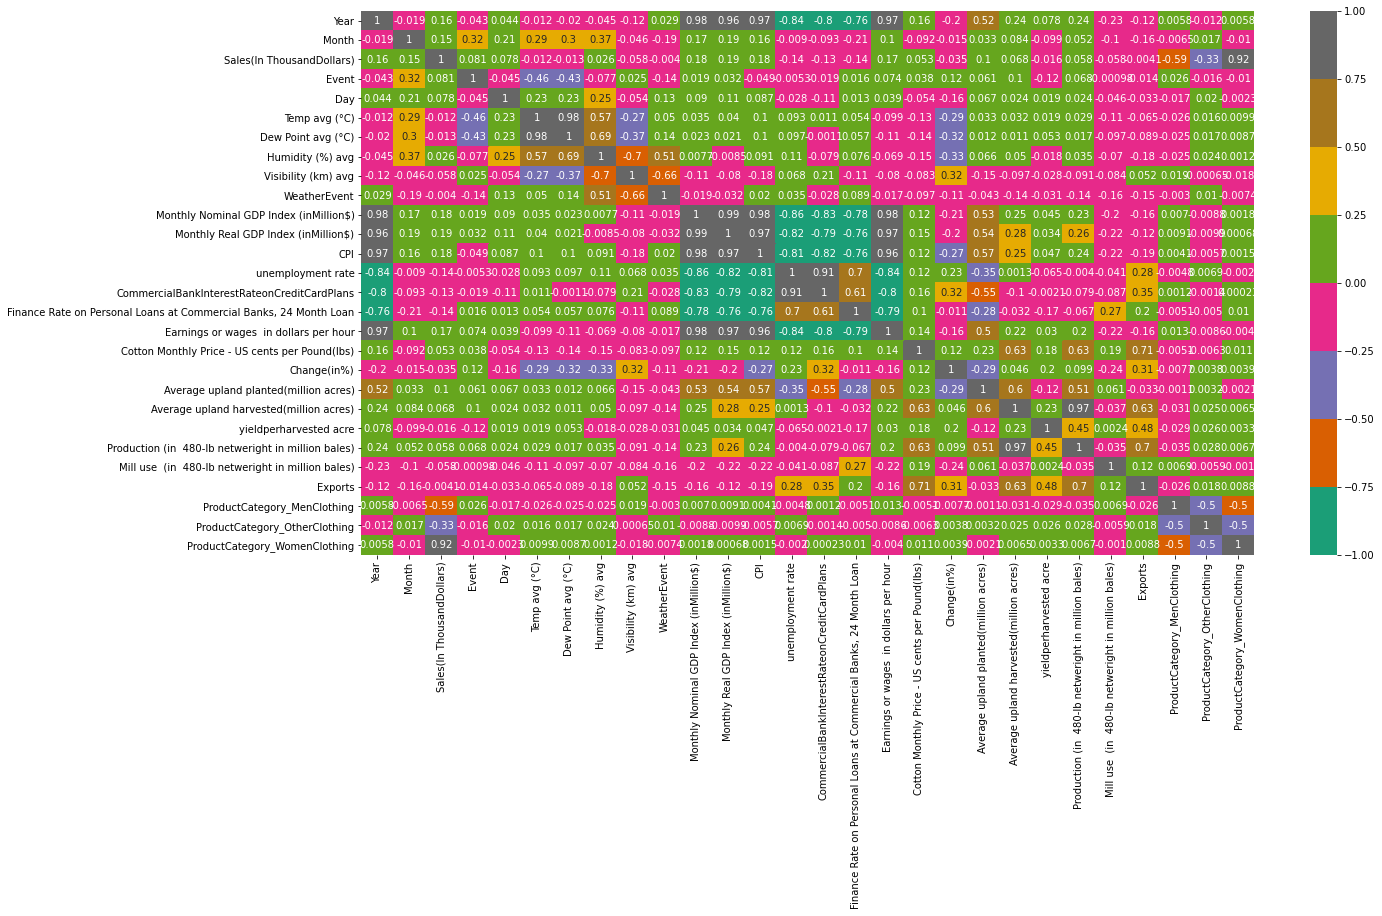

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(s913.corr(),annot=True,vmin=-1,vmax=1, cmap='Dark2')

In [917]:
s913.to_csv("s913.csv",index=True)
s14.to_csv('s14.csv',index=True)

In [924]:
X = s913.drop('Sales(In ThousandDollars)',axis=1)
y = s913['Sales(In ThousandDollars)']

In [353]:
#X = sales_data_09_13.drop('Sales(In ThousandDollars)',axis=1)
#y = sales_data_09_13['Sales(In ThousandDollars)']

In [926]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20)

In [393]:
xsc = sm.add_constant(X)
sm_model = sm.OLS(y, xsc).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Sales(In ThousandDollars)   R-squared:                       0.934
Model:                                   OLS   Adj. R-squared:                  0.922
Method:                        Least Squares   F-statistic:                     77.43
Date:                       Thu, 12 Aug 2021   Prob (F-statistic):           2.61e-71
Time:                               09:47:40   Log-Likelihood:                -1209.0
No. Observations:                        170   AIC:                             2472.
Df Residuals:                            143   BIC:                             2557.
Df Model:                                 26                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                             -1.563e+04   1.73e+04     -0.901      0.369   -4.99e+04    1.87e+04
Year                                                                222.5985    446.648      0.498      0.619    -660.288    1105.485
Month                                                                89.2443     40.123      2.224      0.028       9.934     168.554
Event                                                                18.7280     46.469      0.403      0.688     -73.127     110.583
Day                                                                 148.7574     73.895      2.013      0.046       2.690     294.825
Temp avg (°C)                                                       -14.0626     40.223     -0.350      0.727     -93.570      65.445
Dew Point avg (°C)                                                   -3.4724     41.460     -0.084      0.933     -85.426      78.481
Humidity (%) avg                                                     -7.0627     13.542     -0.522      0.603     -33.831      19.706
Visibility (km) avg                                                 -90.1091     56.481     -1.595      0.113    -201.754      21.536
WeatherEvent                                                          4.9963     17.625      0.283      0.777     -29.842      39.835
Monthly Nominal GDP Index (inMillion$)                               -1.9789      1.928     -1.026      0.306      -5.790       1.832
Monthly Real GDP Index (inMillion$)                                   1.9533      2.120      0.921      0.358      -2.237       6.144
CPI                                                                  93.5773     63.055      1.484      0.140     -31.063     218.218
unemployment rate                                                  -465.0849    197.792     -2.351      0.020    -856.058     -74.112
CommercialBankInterestRateonCreditCardPlans                         323.5967    174.191      1.858      0.065     -20.726     667.919
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    95.6648    170.639      0.561      0.576    -241.636     432.966
Earnings or wages  in dollars per hour                             -301.3101    297.079     -1.014      0.312    -888.544     285.924
Cotton Monthly Price - US cents per Pound(lbs)                       -1.2501      1.978     -0.632      0.528      -5.160       2.659
Change(in%)                                                          -1.4712      4.701     -0.313      0.755     -10.763       7.821
Average upland planted(million acres)                     

In [394]:
lr = RandomForestRegressor()
lr_model = lr.fit(xtrain,ytrain)
print(lr_model.score(xtrain,ytrain))

ypred_test = lr_model.predict(xtest)
np.sqrt(mean_squared_error(ytest,ypred_test))

0.9916335610211369


254.35322544151077

In [395]:
lr_model.predict(s14)

array([3408.65,  692.76, 1189.23, 3432.61,  692.84, 1195.35, 3560.91,
        723.  , 1213.94, 3733.44,  755.24, 1176.1 , 3727.4 ,  752.62,
       1176.74, 3704.42,  744.78, 1162.07, 3664.39,  734.66, 1180.44,
       3445.73,  736.75, 1188.66, 3413.05,  752.57, 1168.68, 3455.14,
        759.84, 1152.22, 3518.17,  762.99, 1178.24, 4414.99, 1053.03,
       1298.43])

In [1170]:
# pca.explained_variance_ratio_

array([9.95167752e-01, 2.40896758e-03, 1.36212357e-03, 7.27708627e-04,
       2.16384862e-04, 5.84518770e-05, 3.28171774e-05, 1.31932201e-05,
       4.96761605e-06, 2.67232503e-06, 1.71936501e-06, 8.75709429e-07,
       6.16233259e-07, 4.04033795e-07, 3.55258324e-07, 3.10723994e-07,
       2.53089800e-07, 1.66659743e-07, 1.40540081e-07, 5.77980852e-08,
       2.91493114e-08, 1.43553305e-08, 8.12847254e-09, 6.93926017e-09,
       2.88639756e-09, 2.27332550e-10, 9.39579489e-33])

In [1171]:
# pca =PCA(8)
# xtrain_scpca = pca.fit_transform(xtrain)
# xtest_scpca  = pca.transform(xtest)
# s14_scpa = pca.transform(s14)
# pca.fit(xtrain,ytrain)

# xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)
# GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 66, 
#                                  learning_rate=0.5099999999999998,subsample= 0.9)


# GB_model_Tunned_v5 = GBoost.fit(xtrain_scpca, ytrain)
# kf = KFold(n_splits=10,shuffle=True)
# trainRMSEscore = cross_val_score(estimator=GBoost, X=xtrain_scpca, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
# trainr2score = cross_val_score(estimator=GBoost, X=xtrain_scpca, y=ytrain, scoring='r2', cv=kf)

# print("Average Train R2   ",np.mean(trainr2score))
# print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
# print("-"*50)
# testRMSEscore = cross_val_score(estimator=GBoost, X=xtest_scpca, y=ytest, scoring='neg_mean_squared_error', cv=kf)
# testr2score = cross_val_score(estimator=GBoost, X=xtest_scpca, y=ytest, scoring='r2', cv=kf)

# print("Average Test R2   ",np.mean(testr2score))
# print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))
# GB_model_Tunned_v5.predict(s14_scpa)

Average Train R2    -1.0324514748951188
Average Train RMSE  1510.022433560792
--------------------------------------------------
Average Test R2    -20.7065102194874
Average Test RMSE  1807.2020834239927


array([1082.17234311, 1082.17234311, 1082.17234311, 1174.23090823,
       1174.23090823, 1174.23090823, 2456.8959502 , 2456.8959502 ,
       2456.8959502 , 3064.08961677, 3064.08961677, 3064.08961677,
       2349.13955092, 2349.13955092, 2349.13955092, 2313.08757505,
       2313.08757505, 2313.08757505, 3376.23006218, 3376.23006218,
       3376.23006218, 2718.47733143, 2718.47733143, 2718.47733143,
       1720.02676982, 1720.02676982, 1720.02676982, 2348.51751243,
       2348.51751243, 2348.51751243, 2803.63804992, 2803.63804992,
       2803.63804992, 3583.4297311 , 3583.4297311 , 3583.4297311 ])

In [1148]:
xte = xtrain.iloc[:,[21,19,9,10,11,20,5,4,15,12,13,6,16,23,18,14,7,22,17]]
vif = pd.DataFrame()
vif['Features'] = xte.columns
vif['VIF'] = [round(variance_inflation_factor(xte.values,i)) for i in range(xte.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,Monthly Real GDP Index (inMillion$),850380
2,Monthly Nominal GDP Index (inMillion$),553061
4,CPI,173085
5,yieldperharvested acre,144359
0,Production (in 480-lb netweright in million b...,142645
1,Average upland harvested(million acres),137900
8,Earnings or wages in dollars per hour,74266
10,CommercialBankInterestRateonCreditCardPlans,6093
15,Finance Rate on Personal Loans at Commercial B...,3792
9,unemployment rate,3523


In [1165]:
xtc = xte.drop(xte.iloc[:,[3,4,8,0,10,2,15,5,17,14,]].columns,axis=1)
vif = pd.DataFrame()
vif['Features'] = xtc.columns
vif['VIF'] = [round(variance_inflation_factor(xtc.values,i)) for i in range(xtc.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
2,Temp avg (°C),240
7,Visibility (km) avg,240
4,Humidity (%) avg,179
6,Exports,144
0,Average upland harvested(million acres),139
1,Dew Point avg (°C),125
3,unemployment rate,114
5,Cotton Monthly Price - US cents per Pound(lbs),24
8,Change(in%),2


In [397]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=lr, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=lr, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=lr, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=lr, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.8947560399252235
Average Train RMSE  363.7002288679592
--------------------------------------------------
Average Test R2    -1.2844388988273303
Average Test RMSE  668.0049016863032


In [399]:
#DATA IS NOT SCALED !


# sg = SGDRegressor()
# sg_model = lr.fit(xtrain,ytrain)

# kf = KFold(n_splits=10,shuffle=True,random_state=10)
# trainRMSEscore = cross_val_score(estimator=sg, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
# trainr2score = cross_val_score(estimator=sg, X=xtrain, y=ytrain, scoring='r2', cv=kf)

# print("Average Train R2   ",np.mean(trainr2score))
# print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
# print("-"*50)
# testRMSEscore = cross_val_score(estimator=sg, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
# testr2score = cross_val_score(estimator=sg, X=xtest, y=ytest, scoring='r2', cv=kf)

# print("Average Test R2   ",np.mean(testr2score))
# print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    -1.6628652680849225e+29
Average Train RMSE  2.938153465158453e+17
--------------------------------------------------
Average Test R2    -4.31077261173336e+29
Average Test RMSE  3.7690511241346394e+17


In [400]:
gb = GradientBoostingRegressor(n_estimators=300,random_state=10)
gb_model = gb.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9669879729736996
Average Train RMSE  194.31415302474562
--------------------------------------------------
Average Test R2    0.8345405145921212
Average Test RMSE  307.71220754241915


In [293]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = gb_model.predict(s14)
te.to_csv("basic_model_3.csv",index=False)

In [369]:
lr = XGBRFRegressor(n_estimators=30,learning_rate=0.99)
lr_model = lr.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=lr, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=lr, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=lr, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=lr, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9477593408905145
Average Train RMSE  245.92151082716867
--------------------------------------------------
Average Test R2    0.7742291095918354
Average Test RMSE  404.7452977351393


In [370]:
rf = RandomForestRegressor(n_estimators=300)
rf_model = rf.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=rf, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=rf, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=rf, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=rf, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9407492787408256
Average Train RMSE  259.7541707080436
--------------------------------------------------
Average Test R2    0.6512956587324951
Average Test RMSE  391.595976416855


In [190]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Feature Selection

In [582]:
len(X.columns)

27

In [930]:
features_set = X.iloc[:,[1,2,3,4,8,11,12,24,25,26]].columns

In [584]:
index = pd.DataFrame()
index['Features']=X.columns
index

,Features
0,Year
1,Month
2,Event
3,Day
4,Temp avg (°C)
5,Dew Point avg (°C)
6,Humidity (%) avg
7,Visibility (km) avg
8,WeatherEvent
9,Monthly Nominal GDP Index (inMillion$)


In [589]:
manual_features_1 = X.iloc[:,[0,1,2,3,4,7,12,15,24,25,26]].columns
print(manual_features_1)

Index(['Year', 'Month', 'Event', 'Day', 'Temp avg (°C)', 'Visibility (km) avg',
       'unemployment rate', 'Earnings or wages  in dollars per hour',
       'ProductCategory_MenClothing', 'ProductCategory_OtherClothing',
       'ProductCategory_WomenClothing'],
      dtype='object')


<AxesSubplot:xlabel='Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan', ylabel='Sales(In ThousandDollars)'>

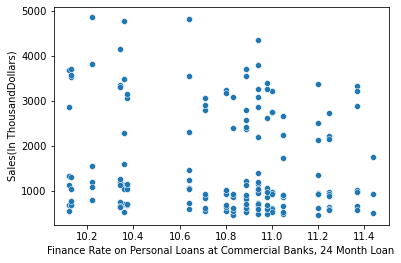

In [515]:
sns.scatterplot(s913['Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan'],s913['Sales(In ThousandDollars)'])

In [767]:
manual_features = X.iloc[:,[0,1,2,3,4,5,6,7,8,11,12,13,15,19,21,22,23,24,25,26]].columns
print(manual_features)

Index(['Year', 'Month', 'Event', 'Day', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent', 'CPI',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Earnings or wages  in dollars per hour',
       'Average upland harvested(million acres)',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'ProductCategory_MenClothing', 'ProductCategory_OtherClothing',
       'ProductCategory_WomenClothing'],
      dtype='object')


In [522]:
# Manual Feature selection
#manual_features = ['Year', 'Month', 'Event', 'Day', 'Temp avg (°C)', 'Dew Point avg (°C)',
       'Humidity (%) avg', 'Visibility (km) avg', 'WeatherEvent','CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Earnings or wages  in dollars per hour',
       'ProductCategory_MenClothing', 'ProductCategory_OtherClothing',
       'ProductCategory_WomenClothing']

In [419]:
sfs = SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',forward=True, scoring='neg_mean_squared_error',cv=kf,verbose=True)
sfs_select_lr = sfs.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished
Features: 1/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.3s finished
Features: 2/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
Features: 3/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
Features: 4/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
Features: 5/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished
Features: 6/27[Parallel(

In [421]:
sfs_forward_features = list(sfs_select_lr.k_feature_names_)
sfs_forward_features

['Year',
 'Month',
 'Day',
 'Temp avg (°C)',
 'Monthly Real GDP Index (inMillion$)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Production (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_OtherClothing',
 'ProductCategory_WomenClothing']

In [ ]:
# sfs = SequentialFeatureSelector(estimator=GradientBoostingRegressor(),k_features='best',forward=True, scoring='neg_mean_squared_error',cv=kf,verbose=True)
# sfs_select_f_gb = sfs.fit(X,y)
# sfs_forward_features_gb = list(sfs_select_f_gb.k_feature_names_)
# sfs_forward_features_gb

#Without tuned Estimator
#BAckward features
#['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland planted(million acres)', 'Average upland harvested(million acres)', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb netweright in million bales)', 'Exports', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']
--------------------------------------------------


#Forward Features
#['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland harvested(million acres)', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']

In [782]:
sfs = SequentialFeatureSelector(estimator=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208),k_features='best',forward=True, scoring='neg_mean_squared_error',cv=kf,verbose=True)
sfs_select_f_gb = sfs.fit(X,y)
sfs_forward_features_gb = list(sfs_select_f_gb.k_feature_names_)
sfs_forward_features_gb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.1s finished
Features: 1/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   14.8s finished
Features: 2/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.5s finished
Features: 3/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   14.3s finished
Features: 4/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   13.9s finished
Features: 5/27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.6s finished
Features: 6/27[Parallel(

['Year',
 'Month',
 'ProductCategory_MenClothing',
 'ProductCategory_WomenClothing']

In [ ]:
#['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland harvested(million acres)', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']

In [783]:
sfs = SequentialFeatureSelector(estimator=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208),k_features='best',forward=False, scoring='neg_mean_squared_error',cv=kf,verbose=True)
sfs_select_b_gb = sfs.fit(X,y)
sfs_backward_features_gb = list(sfs_select_b_gb.k_feature_names_)
sfs_backward_features_gb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   31.1s finished
Features: 26/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   27.8s finished
Features: 25/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   26.5s finished
Features: 24/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   25.2s finished
Features: 23/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   23.6s finished
Features: 22/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   22.8s finished
Features: 21/1[Parallel(

['Month',
 'Temp avg (°C)',
 'CommercialBankInterestRateonCreditCardPlans',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_WomenClothing']

In [784]:
rfe_gb = RFECV(estimator=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208) ,cv= kf, scoring='neg_mean_squared_error')
refe_gb_select = rfe_lr.fit(X,y)
rfegb=pd.DataFrame()
rfegb['Features'] = X.columns
rfegb['Rank'] = refe_gb_select.ranking_
rfe_gb_features = list(rfegb[rfegb['Rank']==1]['Features'])
rfe_gb_features

['Year',
 'Month',
 'Event',
 'Day',
 'Temp avg (°C)',
 'Visibility\xa0(km) avg',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_OtherClothing',
 'ProductCategory_WomenClothing']

In [422]:
sfs = SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',forward=False, scoring='neg_mean_squared_error',cv=kf,verbose=True)
sfs_select_b_lr = sfs.fit(X,y)
sfs_backward_features = list(sfs_select_b_lr.k_feature_names_)
sfs_backward_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished
Features: 26/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s finished
Features: 25/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished
Features: 24/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished
Features: 23/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished
Features: 22/1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s finished
Features: 21/1[Parallel(

['Month',
 'Day',
 'Dew Point avg (°C)',
 'Visibility\xa0(km) avg',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_OtherClothing',
 'ProductCategory_WomenClothing']

In [427]:
rfe_lr = RFECV(estimator=LinearRegression() ,cv= kf, scoring='neg_mean_squared_error')
refe_lr_select = rfe_lr.fit(X,y)
rfe=pd.DataFrame()
rfe['Features'] = X.columns
rfe['Rank'] = refe_lr_select.ranking_
rfe_lr_features = list(rfe[rfe['Rank']==1]['Features'])
rfe_lr_features

['Year',
 'Month',
 'Event',
 'Day',
 'Temp avg (°C)',
 'Visibility\xa0(km) avg',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_OtherClothing',
 'ProductCategory_WomenClothing']

In [468]:
lr = LinearRegression()
lr_model = lr.fit(xtrain[sfs_forward_features],ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=lr, X=xtrain[sfs_forward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=lr, X=xtrain[sfs_forward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=lr, X=xtest[sfs_forward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=lr, X=xtest[sfs_forward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9114374704824538
Average Train RMSE  331.67101656337485
--------------------------------------------------
Average Test R2    0.23994235740581718
Average Test RMSE  416.8582491546379


In [462]:
dt = DecisionTreeRegressor(max_depth=12)
dt_model = dt.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=dt, X=xtrain[rfe_lr_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=dt, X=xtrain[rfe_lr_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=dt, X=xtest[rfe_lr_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=dt, X=xtest[rfe_lr_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.890235478511182
Average Train RMSE  327.1259074988886
--------------------------------------------------
Average Test R2    0.677350867008167
Average Test RMSE  279.99686068864474


In [466]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = dt_model.predict(s14)
te.to_csv("basic_model_4.csv",index=False)

In [482]:
# Extremely high variation in Model...not recommended


dt = DecisionTreeRegressor(max_depth=12,random_state=None)
#dt_model = dt.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=dt, X=xtrain[sfs_forward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=dt, X=xtrain[sfs_forward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=dt, X=xtest[sfs_forward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=dt, X=xtest[sfs_forward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9338633690263466
Average Train RMSE  254.2502386472554
--------------------------------------------------
Average Test R2    0.686727522768181
Average Test RMSE  498.7283382358172


In [485]:
# Good for tunning

rf = RandomForestRegressor(n_estimators=300)
rf_model = rf.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=rf, X=xtrain[sfs_forward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=rf, X=xtrain[sfs_forward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=rf, X=xtest[sfs_forward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=rf, X=xtest[sfs_forward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9586191132703628
Average Train RMSE  223.22322475509282
--------------------------------------------------
Average Test R2    0.6714463365522131
Average Test RMSE  378.8658444540291


In [580]:
#GoOD  Model further for tunning

gb = GradientBoostingRegressor(n_estimators=300,random_state=10)
gb_model = gb.fit(xtrain[rfe_lr_features],ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features_gb], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features_gb], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[sfs_backward_features_gb], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[sfs_backward_features_gb], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9775376607278712
Average Train RMSE  165.0665791033016
--------------------------------------------------
Average Test R2    0.8369557956424627
Average Test RMSE  302.12622160143775


In [568]:
gb_model.predict(s14[rfe_lr_features])

array([2894.72932436,  604.05594405, 1090.28373264, 3185.01521052,
        656.00197765, 1102.62599412, 3704.01626719,  650.56558417,
       1160.71382378, 3813.88624234,  716.43662957, 1153.23613783,
       3809.85039614,  712.72633904, 1165.9137764 , 3625.92436506,
        737.15620544, 1149.79526451, 3559.96235165,  701.39277964,
       1132.68813432, 3486.05259017,  620.70868476, 1050.97485727,
       3468.887613  ,  676.51634614, 1022.11256663, 3628.31073021,
        718.38184176, 1032.5057884 , 3808.0551533 ,  750.89958697,
       1159.49682833, 4836.19740332, 1081.12404133, 1418.42479321])

In [569]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = gb_model.predict(s14[rfe_lr_features])
te.to_csv("basic_model_7.csv",index=False)

In [570]:
#Good model ----Further for tunning


gb = GradientBoostingRegressor(n_estimators=300,random_state=10)
gb_model = gb.fit(xtrain[sfs_backward_features],ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9684141603874155
Average Train RMSE  194.3454497546829
--------------------------------------------------
Average Test R2    0.8835440217851265
Average Test RMSE  261.09724659316436


In [576]:
gb_model.predict(s14[sfs_backward_features])

array([2776.47193201,  606.26122741, 1141.43237837, 3072.75708162,
        623.70764927, 1150.89717404, 3677.43803836,  700.54503168,
       1241.31689461, 3780.08033847,  728.84449733, 1213.17543783,
       3747.70035669,  739.21535942, 1159.15358849, 3672.79782319,
        765.85574475, 1252.79912775, 3543.52055085,  715.33948465,
       1182.35598093, 3682.9431288 ,  776.67634791, 1287.96924571,
       3726.61488822,  771.10031815, 1166.72305393, 3704.18310276,
        789.30958458, 1145.48967241, 3866.4959041 ,  833.26969991,
       1253.31778163, 4868.29940648, 1089.02688078, 1599.69057733])

In [572]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = gb_model.predict(s14[sfs_backward_features])
te.to_csv("basic_model_5.csv",index=False)


#KAGGLE
#just now
#1 seconds
#1 seconds
#295.1187

In [577]:
gb = GradientBoostingRegressor(n_estimators=300,random_state=10)
gb_model = gb.fit(xtrain[manual_features],ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[manual_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[manual_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[manual_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[manual_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9673152276338713
Average Train RMSE  190.91719240219365
--------------------------------------------------
Average Test R2    0.8384639486834791
Average Test RMSE  280.31779365047333


In [578]:
gb_model.predict(s14[manual_features])

array([2787.55426291,  598.02952805, 1052.94533624, 3132.82614057,
        630.50202041, 1067.0019648 , 3675.58640921,  649.67095536,
       1132.30519228, 4014.5398987 ,  827.0711982 , 1232.56501361,
       3935.78375431,  847.42174965, 1254.21218024, 3598.25673848,
        703.14693461, 1140.66173512, 3557.25294827,  652.40380366,
       1094.14159403, 3426.23956693,  661.44362988, 1016.90827531,
       3532.79838905,  663.5827154 ,  986.22908577, 3668.9531351 ,
        718.90346926, 1018.89586574, 3796.88005076,  751.42591773,
       1132.12179549, 4840.78754453, 1078.96205277, 1456.71155283])

In [579]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = gb_model.predict(s14[manual_features])
te.to_csv("basic_model_6.csv",index=False)

#KAGGLE
#297.32912

In [721]:
gb = GradientBoostingRegressor(n_estimators=30,learning_rate=0.19,min_samples_leaf=1)
gb_model = gb.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9522049725294593
Average Train RMSE  209.46234088053524
--------------------------------------------------
Average Test R2    0.8266214956177684
Average Test RMSE  329.6706105049997


In [841]:
#br = BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=30,random_state=10,learning_rate=0.19,min_samples_leaf=1),n_estimators=30)
gb=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9719304728155926
Average Train RMSE  183.42409999143985
--------------------------------------------------
Average Test R2    0.9073242115646012
Average Test RMSE  240.6054477455603


In [759]:
np.sqrt(abs(testRMSEscore))

array([  99.92190293,  239.52811375, 1317.46664982,   91.64570779,
        118.32513011,   22.98637074,  157.91024387,   80.39542821,
         50.82231684,  158.3277292 ,   32.32427886,   47.6699143 ,
         77.65194155, 1150.3540229 ,  405.95730103,  117.16127706,
         99.71062805,   77.67122832,   81.52753374,  199.03676047])

# Grid Search CV

## Random Forest

In [692]:
param_grid = {'criterion':['mse'],'max_depth':[2,4,6,8,10,12,13,14,15],'min_samples_split':[2,3,4,5,6,7],
             'n_estimators':[50,100,150,200]}
kf = KFold(n_splits=10,shuffle=True,random_state=10)
searchrf = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=1)
searchrf.fit(xtrain,ytrain)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 13, 14, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [693]:
searchrf.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_split': 4,
 'n_estimators': 150}

In [694]:
rf_tuned = RandomForestRegressor(criterion= 'mse',max_depth= 8,min_samples_split= 4,n_estimators= 150)
rf_tuned_model = rf.fit(xtrain,ytrain)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=rf_tuned, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=rf_tuned, X=xtrain, y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=rf_tuned, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=rf_tuned, X=xtest, y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9380133570861234
Average Train RMSE  265.58767237855074
--------------------------------------------------
Average Test R2    0.6024818252589288
Average Test RMSE  385.81737824299887


## Gradient Boost

In [ ]:
# {'criterion': 'friedman_mse',
#  'max_depth': 2,
#  'min_samples_split': 3,
#  'n_estimators': 200}

In [ ]:
param_grid = {'criterion':['mse','friedman_mse'],'n_estimators':[100,150,200,250,300],
              'max_depth':[2,3,4,5,10],'min_samples_split':[2,3,4,5],'learning_rate':np.arange(0.1,0.3,0.01),
             'min_samples_leaf':[1,2,3]}
kf = KFold(n_splits=10,shuffle=True,random_state=10)
searchgb = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=True)
searchgb.fit(xtrain,ytrain)
searchgb.best_params_

In [916]:
param_grid = {'criterion':['mse','friedman_mse'],'n_estimators':[100,150,200,250,300],
              'max_depth':[2,3,4,5,10],'min_samples_split':[2,3,4,5],'learning_rate':np.arange(0.1,0.3,0.01)}
kf = KFold(n_splits=10,shuffle=True,random_state=10)
searchgb = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf, verbose=True)
searchgb.fit(xtrain,ytrain)
searchgb.best_params_

Fitting 10 folds for each of 4000 candidates, totalling 40000 fits


KeyboardInterrupt: 

# Model Building using tunned params and feature engeering

In [1101]:
LR = LinearRegression()
LR_bag = BaggingRegressor(base_estimator=LR,n_estimators=30)
LR_boost = AdaBoostRegressor(base_estimator=LR,n_estimators=50,learning_rate=0.19)


RF=RandomForestRegressor(criterion= 'mse',max_depth= 8,min_samples_split= 4,n_estimators= 150)
RF_boost=AdaBoostRegressor(base_estimator=RF,n_estimators=4,random_state=0)


XGB = XGBRegressor(n_estimators =150,learning_rate = 0.19, gamma= 3,max_depth= 2)


GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 66, 
                                 learning_rate=0.5099999999999998,subsample= 0.9)


In [772]:
models = []
models.append(('Linear', LR))
models.append(('BaggedLR', LR_bag))
models.append(('BoostedLR',LR_boost))

models.append(('RF',RF))
models.append(('BoostedRF',RF_boost))

models.append(('GBoost',GBoost))

Linear :  R2 Score 0.8947560399252235,  RMSE 363.7002288679592
Linear :  Bias Error = 0.10524396007477659,  Variance Error=0.03248942404722129
--------------------------------
BaggedLR :  R2 Score 0.8988726171022282,  RMSE 357.08974732976503
BaggedLR :  Bias Error = 0.10112738289777168,  Variance Error=0.030494943654802792
--------------------------------
BoostedLR :  R2 Score 0.8813553650639279,  RMSE 381.9998325546054
BoostedLR :  Bias Error = 0.1186446349360721,  Variance Error=0.047129379855405155
--------------------------------
RF :  R2 Score 0.93509425943953,  RMSE 272.74263682484417
RF :  Bias Error = 0.0649057405604702,  Variance Error=0.05102435047556589
--------------------------------
BoostedRF :  R2 Score 0.9187423928584476,  RMSE 305.216345354294
BoostedRF :  Bias Error = 0.08125760714155253,  Variance Error=0.06949961389687066
--------------------------------
GBoost :  R2 Score 0.9698424234686481,  RMSE 187.02792887594325
GBoost :  Bias Error = 0.030157576531352003,  Var

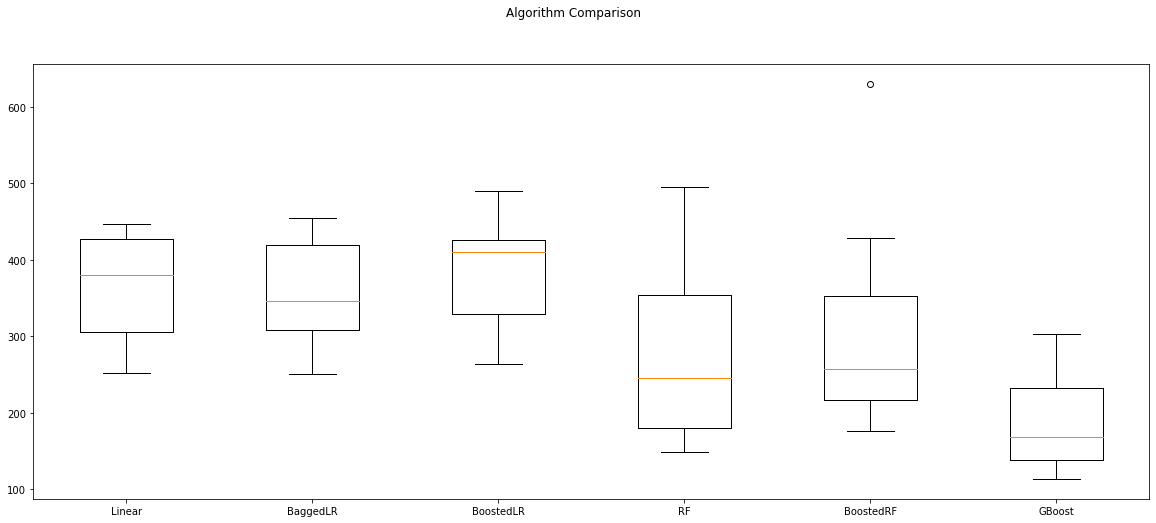

In [704]:
#Train Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtrain, y=ytrain, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtrain, y=ytrain, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear :  R2 Score -1.2844388988273303,  RMSE 668.0049016863032
Linear :  Bias Error = 2.2844388988273305,  Variance Error=3.855640754105721
--------------------------------
BaggedLR :  R2 Score -0.17066828857765642,  RMSE 664.2148338733601
BaggedLR :  Bias Error = 1.1706682885776565,  Variance Error=1.350553936076025
--------------------------------
BoostedLR :  R2 Score -0.5018918056367352,  RMSE 566.4579837073052
BoostedLR :  Bias Error = 1.5018918056367352,  Variance Error=1.9135558830817694
--------------------------------
RF :  R2 Score 0.6438500703318334,  RMSE 377.82299033734233
RF :  Bias Error = 0.3561499296681666,  Variance Error=0.42676708986315215
--------------------------------
BoostedRF :  R2 Score 0.6833313371532188,  RMSE 393.03990970242296
BoostedRF :  Bias Error = 0.31666866284678125,  Variance Error=0.250296060662388
--------------------------------
GBoost :  R2 Score 0.8445777002040554,  RMSE 284.5779929200886
GBoost :  Bias Error = 0.15542229979594455,  Variance 

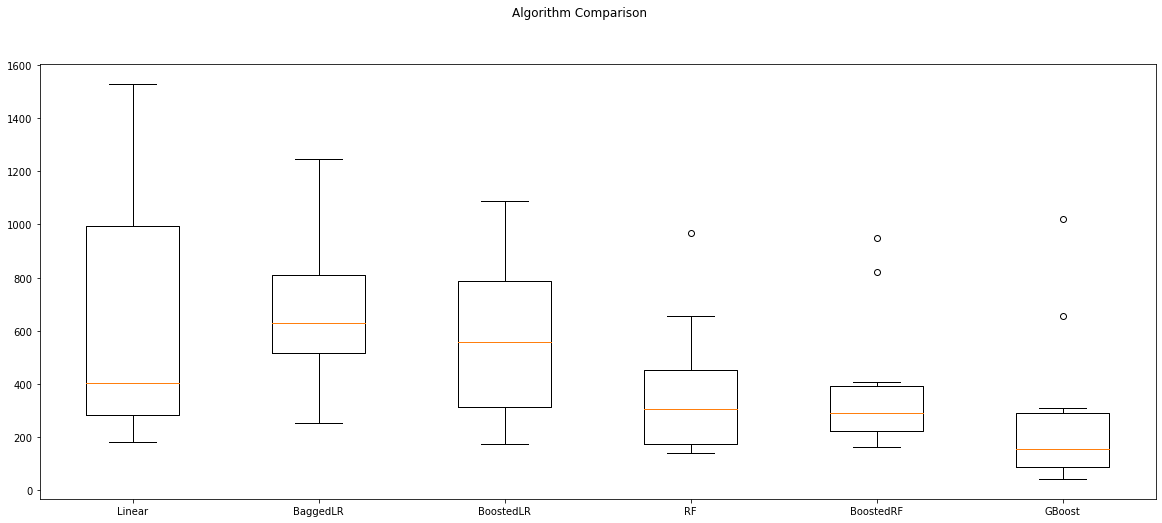

In [727]:
#Test Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    testRMSEscore = cross_val_score(estimator=model, X=xtest, y=ytest, scoring='neg_mean_squared_error', cv=kf)
    testr2score = cross_val_score(estimator=model, X=xtest, y=ytest, scoring='r2', cv=kf)
    
    
    #RMSE Plot
    results.append(np.sqrt(abs(testRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(testr2score),np.mean(np.sqrt(abs(testRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-testr2score),np.std(testr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear :  R2 Score 0.8866981893494887,  RMSE 360.7884146897849
Linear :  Bias Error = 0.11330181065051129,  Variance Error=0.04594888892849369
--------------------------------
BaggedLR :  R2 Score 0.8880221381776663,  RMSE 359.106887894779
BaggedLR :  Bias Error = 0.11197786182233382,  Variance Error=0.04606409897572384
--------------------------------
BoostedLR :  R2 Score 0.8691631286998213,  RMSE 384.6927501813653
BoostedLR :  Bias Error = 0.13083687130017868,  Variance Error=0.04827898508311901
--------------------------------
RF :  R2 Score 0.9629077565974328,  RMSE 210.75972697756634
RF :  Bias Error = 0.03709224340256726,  Variance Error=0.018351739343131637
--------------------------------
BoostedRF :  R2 Score 0.947732678874452,  RMSE 235.9220108991423
BoostedRF :  Bias Error = 0.052267321125547904,  Variance Error=0.03848722982704759
--------------------------------
GBoost :  R2 Score 0.9751689650545229,  RMSE 170.83881465403593
GBoost :  Bias Error = 0.024831034945476983,  V

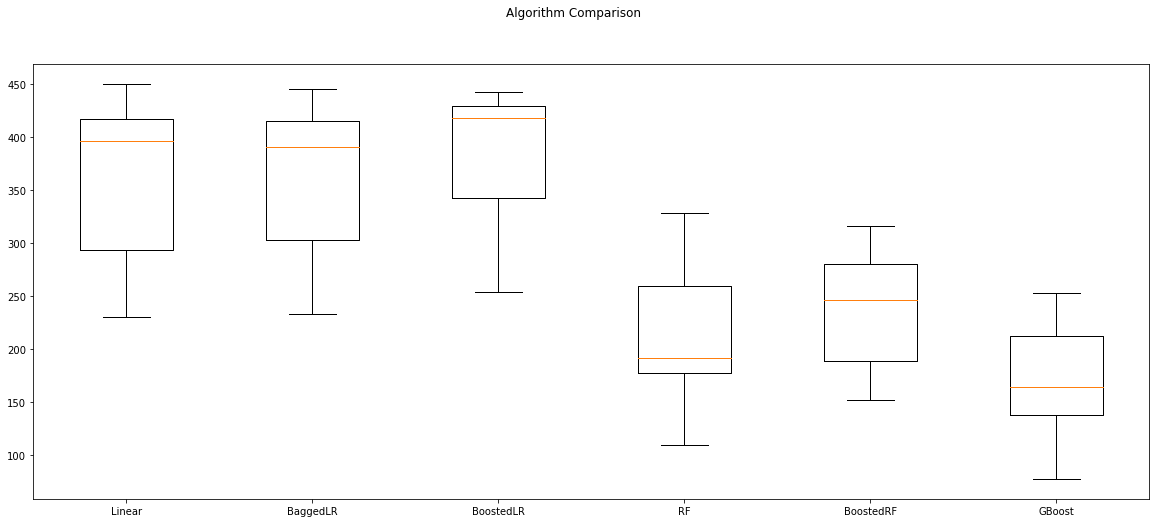

In [766]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=X, y=y, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=X, y=y, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Trials with different features

In [780]:
print(sfs_backward_features)
print("-"*50)
print(sfs_forward_features)
print("-"*50)
print(rfe_lr_features)
print("-"*50)
print(sfs_backward_features_gb)
print("-"*50)
print(sfs_forward_features_gb)
print("-"*50)
print(manual_features_1)
print("-"*50)
print(manual_features)

['Month', 'Day', 'Dew Point avg (°C)', 'Visibility\xa0(km) avg', 'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans', 'Change(in%)', 'Average upland planted(million acres)', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb netweright in million bales)', 'Exports', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']
--------------------------------------------------
['Year', 'Month', 'Day', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'Change(in%)', 'Average upland planted(million acres)', 'Production (in  480-lb netweright in million bales)', 'Exports', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']
--------------------------------------------------
['Year', 'Month', 'Event', 'Day', 'Temp avg (°C)', 'Visibility\xa0(km) avg', 'CPI', 'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans', 'Finance Rate on Personal Loans at Comme

## [sfs_backward_features]

Linear :  R2 Score 0.5682100191414585,  RMSE 328.397526072794
Linear :  Bias Error = 0.43178998085854153,  Variance Error=0.5935388647831432
--------------------------------
BaggedLR :  R2 Score 0.5285557602231328,  RMSE 351.4081582059568
BaggedLR :  Bias Error = 0.4714442397768671,  Variance Error=0.61883219988732
--------------------------------
BoostedLR :  R2 Score 0.41426269867546905,  RMSE 372.61175137226405
BoostedLR :  Bias Error = 0.585737301324531,  Variance Error=0.9093405882297045
--------------------------------
RF :  R2 Score 0.7220437950302537,  RMSE 353.853340084023
RF :  Bias Error = 0.27795620496974627,  Variance Error=0.3006807657426803
--------------------------------
BoostedRF :  R2 Score 0.7595137933278727,  RMSE 346.9292315581468
BoostedRF :  Bias Error = 0.2404862066721273,  Variance Error=0.19087354811136212
--------------------------------
GBoost :  R2 Score 0.9073242115646012,  RMSE 240.6054477455603
GBoost :  Bias Error = 0.0926757884353988,  Variance Error=

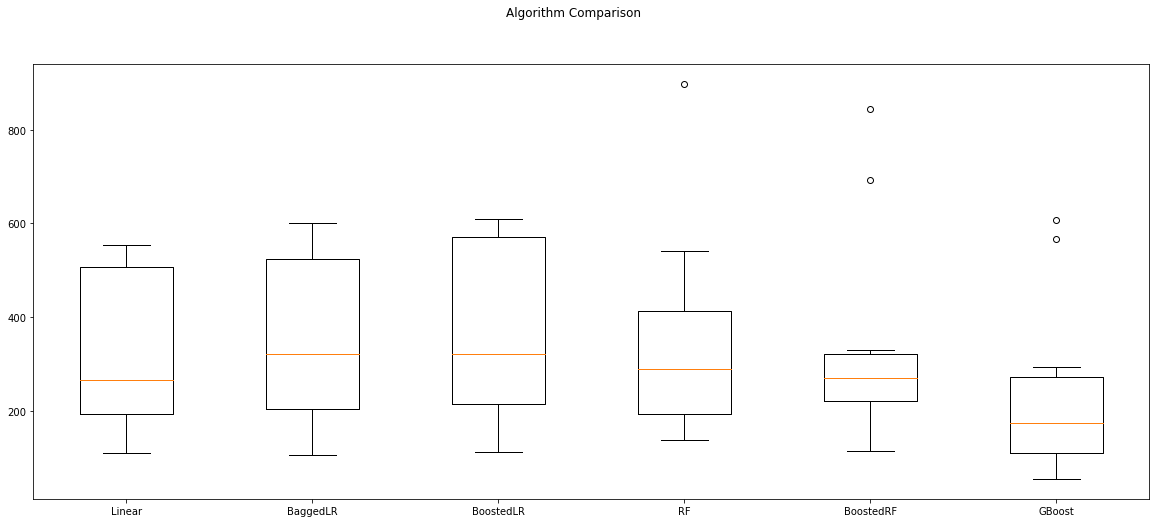

In [826]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[sfs_backward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[sfs_backward_features], y=ytest, scoring='r2', cv=kf)
    
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## sfs_forward_features

Linear :  R2 Score 0.23994235740581718,  RMSE 416.8582491546379
Linear :  Bias Error = 0.7600576425941828,  Variance Error=0.9103960029236224
--------------------------------
BaggedLR :  R2 Score 0.30268461905669086,  RMSE 404.8266945537869
BaggedLR :  Bias Error = 0.6973153809433091,  Variance Error=0.8155281240583634
--------------------------------
BoostedLR :  R2 Score 0.2639917531663835,  RMSE 421.5809206507009
BoostedLR :  Bias Error = 0.7360082468336164,  Variance Error=0.8784538482321035
--------------------------------
RF :  R2 Score 0.6326510160782449,  RMSE 369.51239118117144
RF :  Bias Error = 0.3673489839217551,  Variance Error=0.476375411787334
--------------------------------
BoostedRF :  R2 Score 0.7024393207366904,  RMSE 383.83020788765765
BoostedRF :  Bias Error = 0.2975606792633097,  Variance Error=0.27160919558101604
--------------------------------
GBoost :  R2 Score 0.8088700006678181,  RMSE 327.2509963977904
GBoost :  Bias Error = 0.19112999933218194,  Variance E

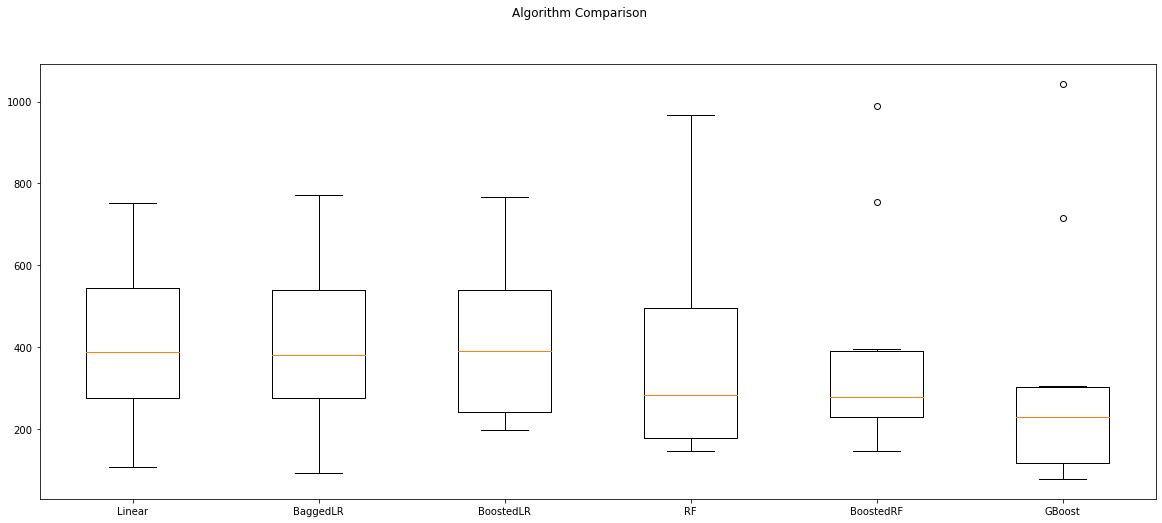

In [827]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[sfs_forward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[sfs_forward_features], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## rfe_lr_features

Linear :  R2 Score 0.16506188974881394,  RMSE 483.02240531954703
Linear :  Bias Error = 0.8349381102511861,  Variance Error=1.0255971907498933
--------------------------------
BaggedLR :  R2 Score -4.947464500297511e+17,  RMSE 134263012970.39473
BaggedLR :  Bias Error = 4.947464500297511e+17,  Variance Error=9.811850099165449e+17
--------------------------------
BoostedLR :  R2 Score -0.06685141501329721,  RMSE 515.8250576526392
BoostedLR :  Bias Error = 1.0668514150132973,  Variance Error=1.3331322825623821
--------------------------------
RF :  R2 Score 0.623091171798585,  RMSE 369.20292671634314
RF :  Bias Error = 0.37690882820141497,  Variance Error=0.5032440023246745
--------------------------------
BoostedRF :  R2 Score 0.6790694244499615,  RMSE 365.99281067714344
BoostedRF :  Bias Error = 0.32093057555003845,  Variance Error=0.3666922932895443
--------------------------------
GBoost :  R2 Score 0.8347492642443968,  RMSE 289.62566693042993
GBoost :  Bias Error = 0.165250735755603

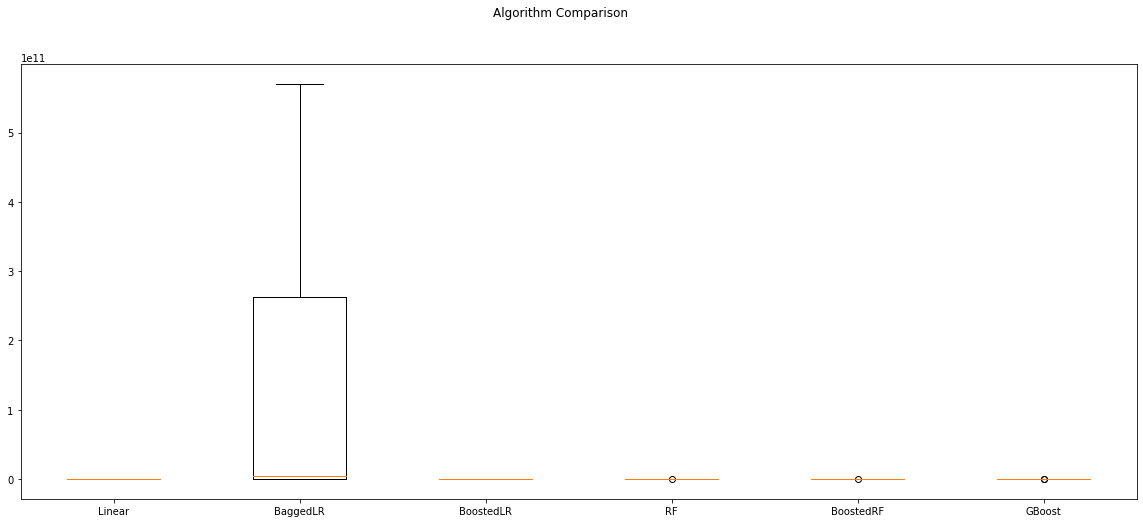

In [828]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[rfe_lr_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[rfe_lr_features], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## sfs_backward_features_gb

In [830]:
sfs_bck_gb_untunned_features=['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland planted(million acres)', 'Average upland harvested(million acres)', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb netweright in million bales)', 'Exports', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']

Linear :  R2 Score 0.49064197042556595,  RMSE 385.526364946972
Linear :  Bias Error = 0.509358029574434,  Variance Error=0.6295472206250756
--------------------------------
BaggedLR :  R2 Score 0.4821030689730745,  RMSE 393.09914059178675
BaggedLR :  Bias Error = 0.5178969310269255,  Variance Error=0.6072594431561785
--------------------------------
BoostedLR :  R2 Score 0.412380352199348,  RMSE 387.89774125968734
BoostedLR :  Bias Error = 0.5876196478006519,  Variance Error=0.8069919406236353
--------------------------------
RF :  R2 Score 0.6568579858584863,  RMSE 373.61415174914987
RF :  Bias Error = 0.34314201414151363,  Variance Error=0.424711136728151
--------------------------------
BoostedRF :  R2 Score 0.7172215101993855,  RMSE 365.6958349690615
BoostedRF :  Bias Error = 0.2827784898006144,  Variance Error=0.2837057134717779
--------------------------------
GBoost :  R2 Score 0.8602263954937325,  RMSE 283.5577109514643
GBoost :  Bias Error = 0.13977360450626755,  Variance Erro

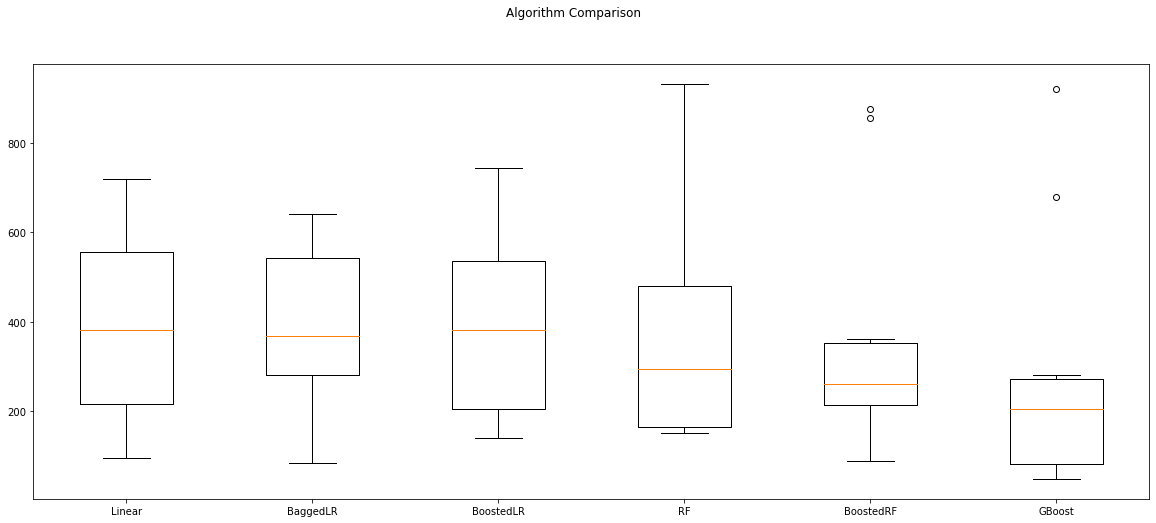

In [831]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[sfs_bck_gb_untunned_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[sfs_bck_gb_untunned_features], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## sfs_forward_features_gb

In [832]:
sfs_fwd_gb_untunned_features = ['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland harvested(million acres)', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']

Linear :  R2 Score 0.5302725663936273,  RMSE 358.8403587002725
Linear :  Bias Error = 0.4697274336063727,  Variance Error=0.6278762655142559
--------------------------------
BaggedLR :  R2 Score 0.4810245296800959,  RMSE 368.4958892102266
BaggedLR :  Bias Error = 0.5189754703199041,  Variance Error=0.6571191688505603
--------------------------------
BoostedLR :  R2 Score 0.6529810003633184,  RMSE 359.944489675581
BoostedLR :  Bias Error = 0.3470189996366816,  Variance Error=0.4510922082910718
--------------------------------
RF :  R2 Score 0.71238843956317,  RMSE 346.1866813441662
RF :  Bias Error = 0.2876115604368301,  Variance Error=0.38855310844771146
--------------------------------
BoostedRF :  R2 Score 0.6776731984542397,  RMSE 364.6797934566565
BoostedRF :  Bias Error = 0.32232680154576043,  Variance Error=0.4506262809074202
--------------------------------
GBoost :  R2 Score 0.8046012188446209,  RMSE 279.66872393005167
GBoost :  Bias Error = 0.19539878115537893,  Variance Error

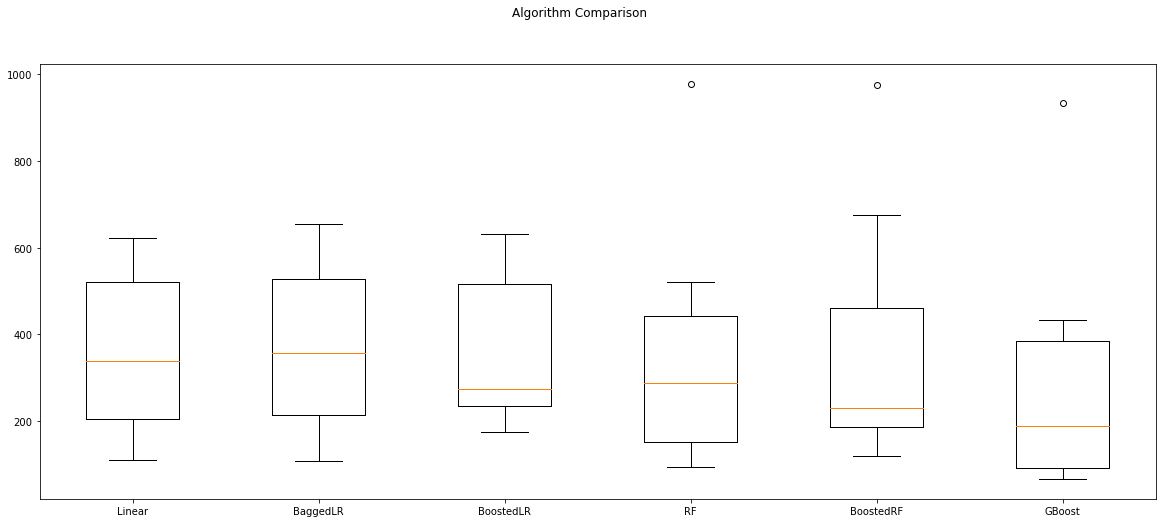

In [833]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[sfs_fwd_gb_untunned_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[sfs_fwd_gb_untunned_features], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## manual_features_1

Linear :  R2 Score 0.3213542748966801,  RMSE 442.4797792457815
Linear :  Bias Error = 0.6786457251033198,  Variance Error=0.8499795299356221
--------------------------------
BaggedLR :  R2 Score 0.18692823183592555,  RMSE 435.509843828436
BaggedLR :  Bias Error = 0.8130717681640744,  Variance Error=1.0870353720599195
--------------------------------
BoostedLR :  R2 Score 0.23441614490386523,  RMSE 454.85024729436043
BoostedLR :  Bias Error = 0.7655838550961348,  Variance Error=1.022384654096843
--------------------------------
RF :  R2 Score 0.6361289806672548,  RMSE 350.1144942700054
RF :  Bias Error = 0.36387101933274524,  Variance Error=0.589073541148362
--------------------------------
BoostedRF :  R2 Score 0.6381411302519845,  RMSE 356.90833206149966
BoostedRF :  Bias Error = 0.3618588697480155,  Variance Error=0.5187165950487506
--------------------------------
GBoost :  R2 Score 0.8116123033099221,  RMSE 264.3367238847108
GBoost :  Bias Error = 0.18838769669007793,  Variance Err

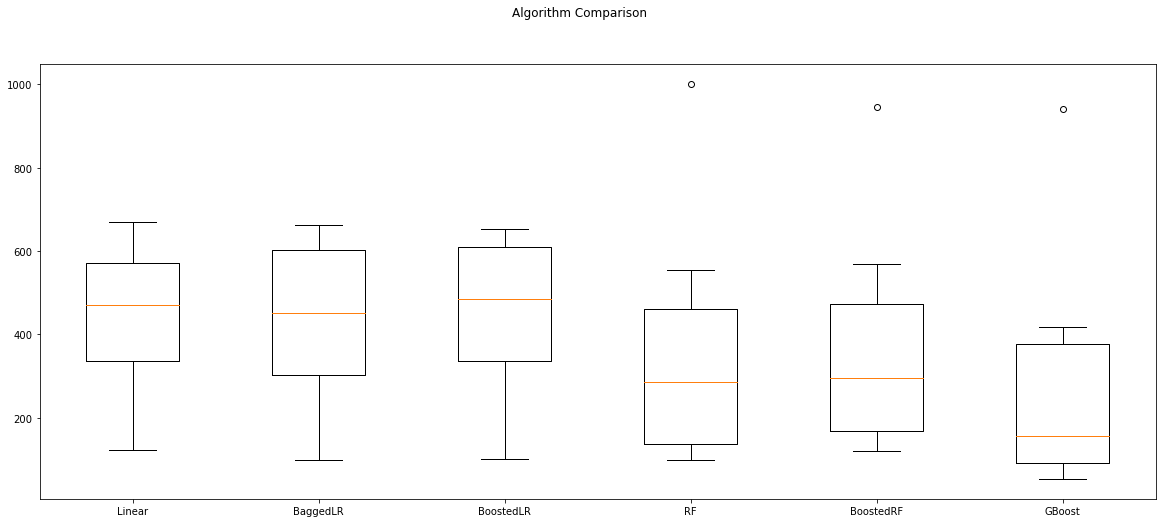

In [834]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[manual_features_1], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[manual_features_1], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## manual_features

Linear :  R2 Score -0.10802561960225518,  RMSE 533.2947535907928
Linear :  Bias Error = 1.1080256196022549,  Variance Error=1.6158649345987937
--------------------------------
BaggedLR :  R2 Score -5.174847459849473e+18,  RMSE 454495937645.2887
BaggedLR :  Bias Error = 5.174847459849473e+18,  Variance Error=1.0848120784246577e+19
--------------------------------
BoostedLR :  R2 Score -0.2440404922489951,  RMSE 560.7508297880753
BoostedLR :  Bias Error = 1.2440404922489952,  Variance Error=1.8815890080385573
--------------------------------
RF :  R2 Score 0.6116468006722438,  RMSE 362.2507484676882
RF :  Bias Error = 0.3883531993277562,  Variance Error=0.5041155171747397
--------------------------------
BoostedRF :  R2 Score 0.6759143300568333,  RMSE 390.8341637578388
BoostedRF :  Bias Error = 0.32408566994316673,  Variance Error=0.3297928397549683
--------------------------------
GBoost :  R2 Score 0.7797035562527528,  RMSE 285.28499115674765
GBoost :  Bias Error = 0.22029644374724722,

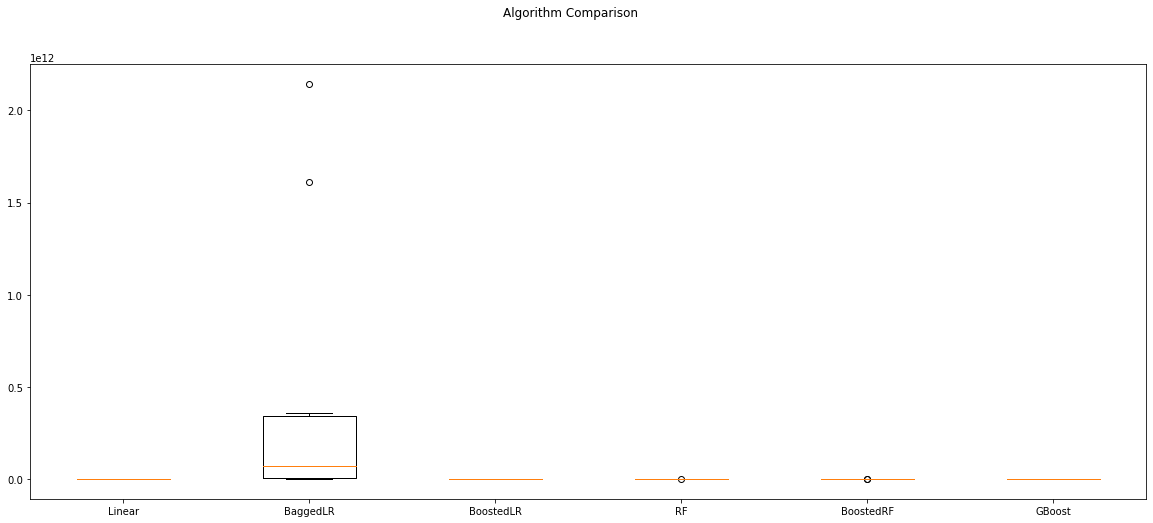

In [835]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=xtest[manual_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=xtest[manual_features], y=ytest, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Feature selection from hypertunned Gradient Boost Model

In [785]:
print(sfs_backward_features_gb)
print("-"*50)
print(sfs_forward_features_gb)
print("-"*50)
print(rfe_gb_features)

['Month', 'Temp avg (°C)', 'CommercialBankInterestRateonCreditCardPlans', 'Earnings or wages  in dollars per hour', 'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)', 'yieldperharvested acre', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb netweright in million bales)', 'Exports', 'ProductCategory_MenClothing', 'ProductCategory_WomenClothing']
--------------------------------------------------
['Year', 'Month', 'ProductCategory_MenClothing', 'ProductCategory_WomenClothing']
--------------------------------------------------
['Year', 'Month', 'Event', 'Day', 'Temp avg (°C)', 'Visibility\xa0(km) avg', 'CPI', 'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans', 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan', 'Earnings or wages  in dollars per hour', 'Average upland planted(million acres)', 'Average upland harvested(million acres)', 'Production (in  480-lb netweright in million bales)', 'Mill use  (in  480-lb 

Linear :  R2 Score 0.8961045447215165,  RMSE 348.0400464596546
Linear :  Bias Error = 0.10389545527848343,  Variance Error=0.03808981558246685
--------------------------------
BaggedLR :  R2 Score 0.8952188086722535,  RMSE 347.41394165576446
BaggedLR :  Bias Error = 0.1047811913277465,  Variance Error=0.03663672175611502
--------------------------------
BoostedLR :  R2 Score 0.8893873328234878,  RMSE 364.223617726194
BoostedLR :  Bias Error = 0.11061266717651226,  Variance Error=0.037399394462733236
--------------------------------
RF :  R2 Score 0.9730291540579895,  RMSE 185.06156086152197
RF :  Bias Error = 0.026970845942010536,  Variance Error=0.009546654455591034
--------------------------------
BoostedRF :  R2 Score 0.9593349818285605,  RMSE 217.71933762909788
BoostedRF :  Bias Error = 0.04066501817143951,  Variance Error=0.01886459060677731
--------------------------------
GBoost :  R2 Score 0.9840409410651547,  RMSE 138.09840871134708
GBoost :  Bias Error = 0.015959058934845262,

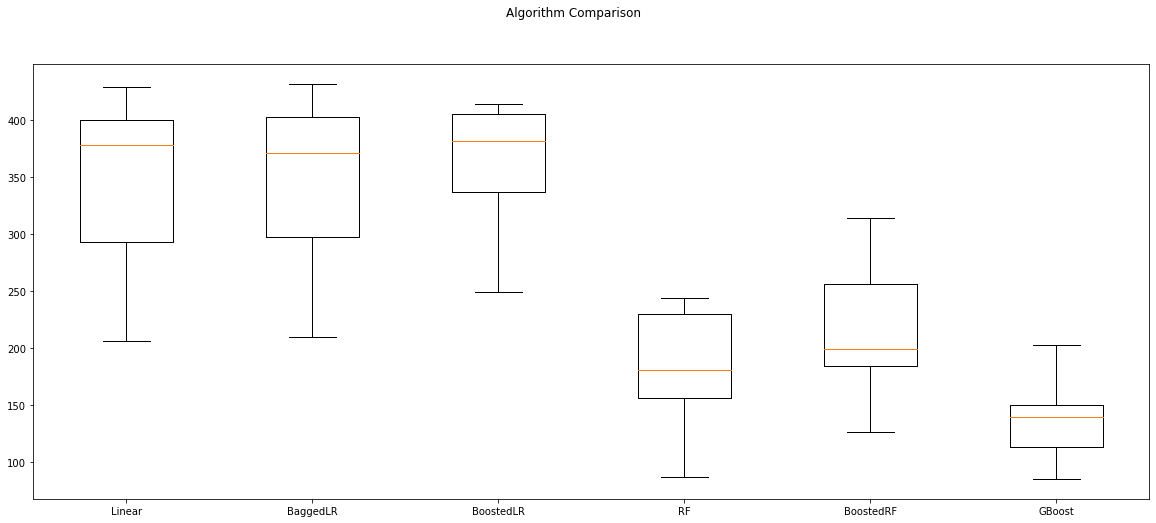

In [786]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=X[sfs_backward_features_gb], y=y, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=X[sfs_backward_features_gb], y=y, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear :  R2 Score 0.9017266680191962,  RMSE 341.90272613942545
Linear :  Bias Error = 0.09827333198080376,  Variance Error=0.037491939443520805
--------------------------------
BaggedLR :  R2 Score 0.9002318186417687,  RMSE 343.30493943190805
BaggedLR :  Bias Error = 0.09976818135823122,  Variance Error=0.038450335364283356
--------------------------------
BoostedLR :  R2 Score 0.8977276400338156,  RMSE 347.646699145692
BoostedLR :  Bias Error = 0.10227235996618451,  Variance Error=0.03250024727959952
--------------------------------
RF :  R2 Score 0.9826814689682666,  RMSE 144.26273738969942
RF :  Bias Error = 0.01731853103173343,  Variance Error=0.0058345335935255545
--------------------------------
BoostedRF :  R2 Score 0.9777895675402737,  RMSE 155.91836692111912
BoostedRF :  Bias Error = 0.022210432459726294,  Variance Error=0.01762633888522072
--------------------------------
GBoost :  R2 Score 0.9883871886610889,  RMSE 117.68167965436547
GBoost :  Bias Error = 0.011612811338911

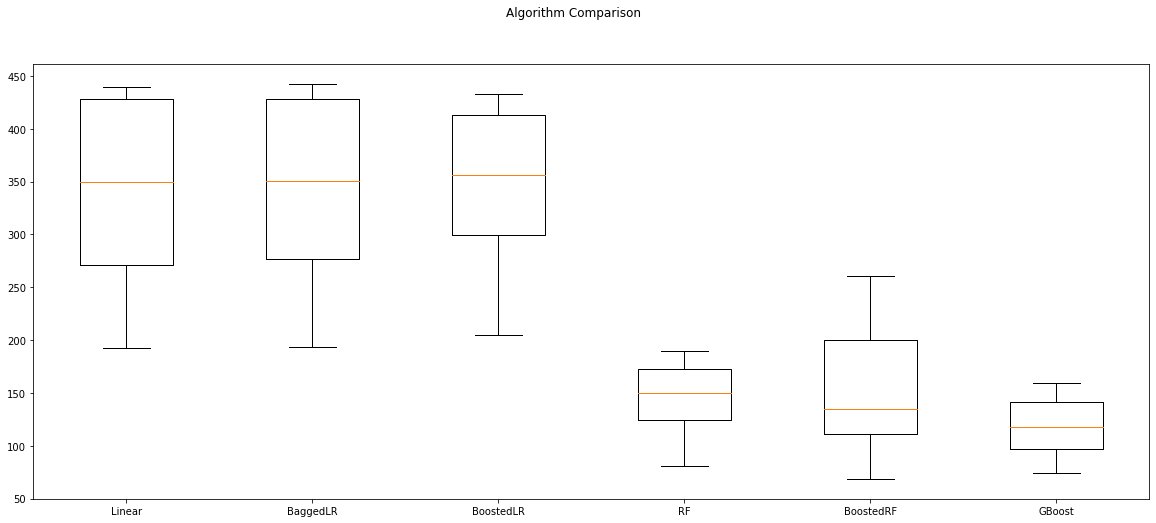

In [787]:
#Entire Dataset-------------------------So far the best
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=X[sfs_forward_features_gb], y=y, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=X[sfs_forward_features_gb], y=y, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear :  R2 Score 0.8996225842862764,  RMSE 342.1106633587003
Linear :  Bias Error = 0.10037741571372347,  Variance Error=0.037910976117589784
--------------------------------
BaggedLR :  R2 Score 0.9020043576448273,  RMSE 339.5663251412394
BaggedLR :  Bias Error = 0.09799564235517272,  Variance Error=0.034727897158463854
--------------------------------
BoostedLR :  R2 Score 0.8861772621956658,  RMSE 358.27870152214183
BoostedLR :  Bias Error = 0.11382273780433408,  Variance Error=0.042018761551727964
--------------------------------
RF :  R2 Score 0.9650505209593023,  RMSE 205.24444283718168
RF :  Bias Error = 0.034949479040697715,  Variance Error=0.01880119562759777
--------------------------------
BoostedRF :  R2 Score 0.9452118190559882,  RMSE 251.074081058461
BoostedRF :  Bias Error = 0.05478818094401174,  Variance Error=0.026362091466723452
--------------------------------
GBoost :  R2 Score 0.9755340717351034,  RMSE 169.46871527817103
GBoost :  Bias Error = 0.02446592826489676

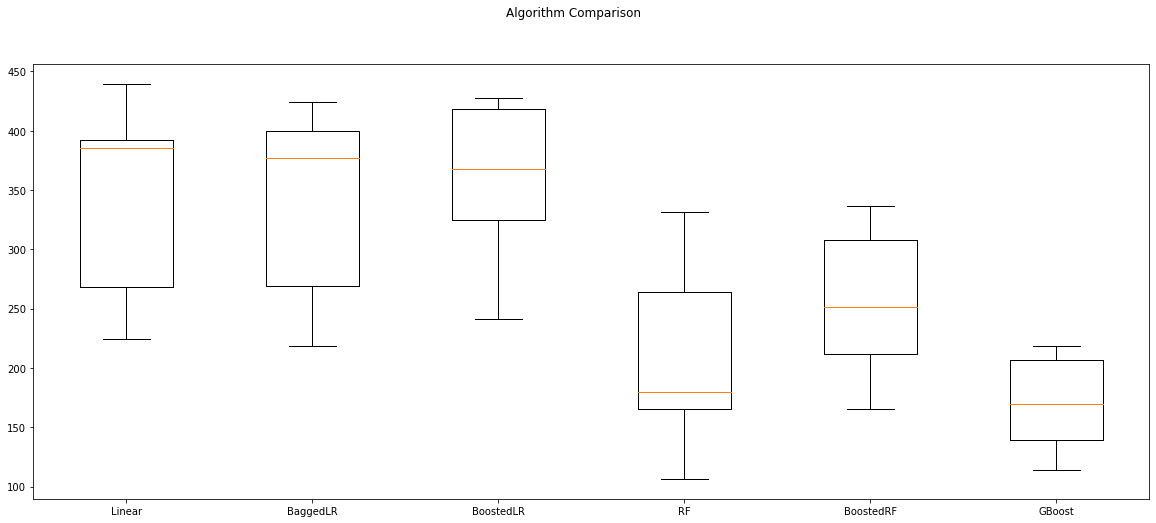

In [788]:
#Entire Dataset
results = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=10)
    
    trainRMSEscore = cross_val_score(estimator=model, X=X[rfe_gb_features], y=y, scoring='neg_mean_squared_error', cv=kf)
    trainr2score = cross_val_score(estimator=model, X=X[rfe_gb_features], y=y, scoring='r2', cv=kf)
    
    #RMSE Plot
    results.append(np.sqrt(abs(trainRMSEscore)))
    names.append(name)
    print("{} :  R2 Score {},  RMSE {}".format(name, np.mean(trainr2score),np.mean(np.sqrt(abs(trainRMSEscore)))))
    print("{} :  Bias Error = {},  Variance Error={}".format(name, np.mean(1-trainr2score),np.std(trainr2score,ddof=1)))
    print("-"*32)
   # boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Final Model Building

## 1. GB + sfs_forward_features 

In [813]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208)
GB_model_Tunned_v1 = GBoost.fit(X[sfs_forward_features],y)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=GBoost, X=X[sfs_forward_features], y=y, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=X[sfs_forward_features], y=y, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))


Average Train R2    0.9814829587574596
Average Train RMSE  148.93878704028907


In [814]:
GB_model_Tunned_v1.predict(s14[sfs_forward_features])

array([2799.22520514,  586.81110291, 1132.22403856, 3038.23718641,
        535.23599058, 1067.80063209, 3722.55689026,  719.89022835,
       1227.61890709, 3746.46064154,  722.72214467, 1196.20290645,
       3818.21563282,  786.45516802, 1272.46394637, 3648.751788  ,
        730.70732288, 1214.09788907, 3484.50812223,  611.07819024,
       1081.94073986, 3578.25915861,  651.85165848, 1122.7142081 ,
       3539.80826566,  645.0732704 , 1107.44979854, 3645.91462969,
        674.35403345, 1124.20254501, 3788.85125378,  721.71821847,
       1171.56673003, 4804.03176003, 1057.6023622 , 1523.43698803])

In [815]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v1.predict(s14[sfs_forward_features])
te.to_csv("GB_tunned_FeatureSet_v1.csv",index=False)

#Kaggle
313.78568

## 2. GB + sfs_forward_features_gb

In [816]:
sfs_fwd_gb_untunned_features = ['Year', 'Month', 'Temp avg (°C)', 'Monthly Real GDP Index (inMillion$)', 'unemployment rate', 'Average upland harvested(million acres)', 'ProductCategory_MenClothing', 'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing']

In [865]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208)
GB_model_Tunned_v2 = GBoost.fit(X[sfs_fwd_gb_untunned_features],y)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))

GB_model_Tunned_v2.predict(s14[sfs_fwd_gb_untunned_features])

Average Train R2    0.9808241557725124
Average Train RMSE  149.29438715391876


array([2959.51749065,  624.66932501, 1201.02091462, 3209.05724789,
        605.43242375, 1181.78401336, 3730.63408319,  723.07870579,
       1262.8343677 , 3849.41661514,  792.02446393, 1233.37524085,
       3919.53460694,  767.29571942, 1192.80068954, 3649.33149783,
        803.41301895, 1229.35638575, 3599.88906   ,  789.27582005,
       1206.53472072, 3505.60635159,  728.55960146, 1137.18989105,
       3582.4962952 ,  736.57781632, 1162.52118312, 3722.8742384 ,
        783.40248747, 1193.70594319, 3818.75489631,  781.02141196,
       1232.4570208 , 4879.64308702, 1131.87003432, 1595.0829221 ])

In [818]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v2.predict(s14[sfs_fwd_gb_untunned_features])
te.to_csv("GB_tunned_FeatureSet_v2.csv",index=False)

#Kaggle
271.54052

## 3.GB + sfs_forward_features_gb

In [819]:
sfs_forward_features_gb

['Year',
 'Month',
 'ProductCategory_MenClothing',
 'ProductCategory_WomenClothing']

In [820]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19,random_state=208)
GB_model_Tunned_v3 = GBoost.fit(X[sfs_forward_features_gb],y)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=GBoost, X=X[sfs_forward_features_gb], y=y, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=X[sfs_forward_features_gb], y=y, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))

GB_model_Tunned_v3.predict(s14[sfs_forward_features_gb])

Average Train R2    0.9883871886610889
Average Train RMSE  117.68167965436547


array([2625.37662548,  482.84257849, 1037.00049333, 2872.23027842,
        603.39615886, 1178.45090476, 3624.04349843,  729.03970737,
       1304.09445327, 3738.0729408 ,  793.734203  , 1324.11141561,
       3796.05046421,  815.20605394, 1345.58326655, 3417.20816915,
        743.6268716 , 1242.3278142 , 3294.27892347,  657.73836587,
       1156.43930848, 3476.50274858,  707.9430488 , 1206.64399141,
       3507.04668299,  713.16482275, 1211.86576535, 3598.56025591,
        761.62855294, 1263.57446919, 3750.9433726 ,  798.88407865,
       1300.8299949 , 4836.66811435, 1111.6321528 , 1644.99629405])

In [821]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v3.predict(s14[sfs_forward_features_gb])
te.to_csv("GB_tunned_FeatureSet_v3.csv",index=False)

#KAggle
324.23764

## 4.GB + sfs_backward_features_gb

In [822]:
sfs_backward_features_gb

['Month',
 'Temp avg (°C)',
 'CommercialBankInterestRateonCreditCardPlans',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'ProductCategory_MenClothing',
 'ProductCategory_WomenClothing']

In [ ]:
0.2899999999999999

In [1087]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 270, 
                                 learning_rate=0.5099999999999998,subsample= 0.9)
GB_model_Tunned_v4 = GBoost.fit(X[sfs_fwd_gb_untunned_features],y)

kf = KFold(n_splits=10,shuffle=True)
trainRMSEscore = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))

GB_model_Tunned_v4.predict(s14[sfs_fwd_gb_untunned_features])

Average Train R2    0.9784347606237409
Average Train RMSE  160.08598106990004


array([2748.10863385,  376.94918902, 1017.9183445 , 3120.03083688,
        409.70089379, 1020.50571596, 3726.06004443,  614.85614443,
       1225.6609666 , 3827.4833863 ,  641.56375795, 1189.67813239,
       3928.92502441,  615.07637407, 1148.16939807, 3575.01027989,
        676.94653692, 1161.19312439, 3575.05645585,  686.47768065,
       1170.72426811, 3477.37438386,  684.93954451, 1168.2664366 ,
       3499.91535578,  672.22015024, 1130.47628763, 3651.99571602,
        766.21370575, 1220.58230273, 3828.1763476 ,  806.87751285,
       1297.66917238, 4832.55598213, 1045.64432213, 1603.77649693])

In [1080]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v4.predict(s14[sfs_fwd_gb_untunned_features])
te.to_csv("GB_tunned_FeatureSet_v4.csv",index=False)

#Kaggle
#387.66145

## 5. GB and sfsBackward Feature

In [1060]:
#br = BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=30,random_state=10,learning_rate=0.19,min_samples_leaf=1),n_estimators=30)
gb=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 300, 
                                 learning_rate=0.2899999999999999,subsample= 0.9)

GB_model_Tunned_v5 = gb.fit(xtrain[sfs_backward_features], ytrain)
kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9757200073158536
Average Train RMSE  199.0212445589737
--------------------------------------------------
Average Test R2    0.2564237591921555
Average Test RMSE  164.13767667973886


In [1061]:
GB_model_Tunned_v5.predict(s14[sfs_backward_features])

array([3115.82057034,  886.30574085, 1062.31282537, 3301.08226792,
        696.90769753, 1107.36587123, 3780.15304919,  785.93405727,
       1204.95453191, 3736.2058713 ,  747.96178532, 1116.94928339,
       3787.15969953,  843.23291228, 1172.57620191, 3784.63900597,
        946.12290971, 1265.4211241 , 3611.89327559,  699.21902541,
       1085.65350627, 3703.57731602,  612.4254485 , 1036.07143872,
       3748.90145236,  874.63446332, 1229.68357048, 3662.25134393,
        779.42205395, 1143.03346206, 3718.9189049 ,  757.02785176,
       1166.94853743, 4806.64118855, 1130.44634386, 1465.68506189])

In [844]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v5.predict(s14[sfs_backward_features])
te.to_csv("GB_tunned_FeatureSet_v5.csv",index=False)

In [853]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v5.predict(s14[sfs_backward_features])
te.to_csv("GB_tunned_FeatureSet_v6.csv",index=False)

In [949]:
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 200, 
                                 learning_rate=0.19)
GB_model_Tunned_v2 = GBoost.fit(X[sfs_fwd_gb_untunned_features],y)

kf = KFold(n_splits=10,shuffle=True,random_state=10)
trainRMSEscore = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=GBoost, X=X[sfs_fwd_gb_untunned_features], y=y, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))

GB_model_Tunned_v2.predict(s14[sfs_fwd_gb_untunned_features])

Average Train R2    0.9808245865712883
Average Train RMSE  149.55420151155099


array([2959.51749065,  624.66932501, 1201.02091462, 3209.05724789,
        605.43242375, 1181.78401336, 3730.63408319,  723.07870579,
       1262.8343677 , 3849.41661514,  792.02446393, 1233.37524085,
       3919.53460694,  767.29571942, 1192.80068954, 3649.33149783,
        803.41301895, 1229.35638575, 3599.88906   ,  789.27582005,
       1206.53472072, 3505.60635159,  728.55960146, 1137.18989105,
       3582.4962952 ,  736.57781632, 1162.52118312, 3722.8742384 ,
        783.40248747, 1193.70594319, 3818.75489631,  781.02141196,
       1232.4570208 , 4879.64308702, 1131.87003432, 1595.0829221 ])

In [915]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v2.predict(s14[sfs_fwd_gb_untunned_features])
te.to_csv("GB_tunned_FeatureSet_v11.csv",index=False)

In [940]:
features_set

Index(['Month', 'Event', 'Day', 'Temp avg (°C)', 'WeatherEvent', 'CPI',
       'unemployment rate', 'ProductCategory_MenClothing',
       'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing'],
      dtype='object')

In [1143]:

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)
GBoost=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 66, 
                                 learning_rate=0.5099999999999998,subsample= 0.9)
lr = LinearRegression()

GB_model_Tunned_v5 = lr.fit(xtrain[sfs_fwd_gb_untunned_features], ytrain)
kf = KFold(n_splits=10,shuffle=True)
trainRMSEscore = cross_val_score(estimator=lr, X=xtrain[sfs_fwd_gb_untunned_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=lr, X=xtrain[sfs_fwd_gb_untunned_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=lr, X=xtest[sfs_fwd_gb_untunned_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=lr, X=xtest[sfs_fwd_gb_untunned_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))
GB_model_Tunned_v5.predict(s14[sfs_fwd_gb_untunned_features])

Average Train R2    0.9003949801190819
Average Train RMSE  317.56747111623525
--------------------------------------------------
Average Test R2    -1.9479329561287095
Average Test RMSE  490.7975642943694


array([3397.45470831,  891.22250236, 1306.67468063, 3424.99328943,
        918.76108347, 1334.21326175, 3454.3111785 ,  948.07897254,
       1363.53115082, 3457.99502594,  951.76281999, 1367.21499826,
       3457.9527706 ,  951.72056464, 1367.17274292, 3480.32866226,
        974.09645631, 1389.54863458, 3505.00279975,  998.77059379,
       1414.22277207, 3592.16390167, 1085.93169571, 1501.38387399,
       3678.4401722 , 1172.20796624, 1587.66014451, 3809.03038395,
       1302.798178  , 1718.25035627, 3949.20518484, 1442.97297889,
       1858.42515716, 4043.55254975, 1537.32034379, 1952.77252206])

In [1109]:
te = pd.DataFrame()
te['Year'] = np.arange(1,37)
te['Sales(In ThousandDollars)'] = GB_model_Tunned_v5.predict(s14[sfs_fwd_gb_untunned_features])
te.to_csv("GB_tunned_FeatureSet_v12.csv",index=False)

In [ ]:
'learning_rate': 0.2899999999999999

In [1054]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25,random_state=208)
gb=GradientBoostingRegressor(criterion= 'friedman_mse',max_depth= 2,min_samples_split= 3,n_estimators= 300, 
                                 learning_rate=0.2899999999999999,subsample= 0.9)

GB_model_Tunned_v6 = gb.fit(xtrain[sfs_backward_features], ytrain)
kf = KFold(n_splits=10,shuffle=True)
trainRMSEscore = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='neg_mean_squared_error', cv=kf)
trainr2score = cross_val_score(estimator=gb, X=xtrain[sfs_backward_features], y=ytrain, scoring='r2', cv=kf)

print("Average Train R2   ",np.mean(trainr2score))
print("Average Train RMSE ",np.mean(np.sqrt(abs(trainRMSEscore))))
print("-"*50)
testRMSEscore = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='neg_mean_squared_error', cv=kf)
testr2score = cross_val_score(estimator=gb, X=xtest[sfs_backward_features], y=ytest, scoring='r2', cv=kf)

print("Average Test R2   ",np.mean(testr2score))
print("Average Test RMSE ",np.mean(np.sqrt(abs(testRMSEscore))))

Average Train R2    0.9710386325528295
Average Train RMSE  203.13462253442424
--------------------------------------------------
Average Test R2    0.8467649030350085
Average Test RMSE  169.35447436471216


In [1055]:
GB_model_Tunned_v6.predict(s14[sfs_backward_features])

array([2812.53126761,  748.61265582,  994.27422628, 3072.20931314,
        584.02647979,  999.45644556, 3645.40615469,  826.60741397,
       1186.20704173, 3716.31765908,  826.77822305, 1141.34819759,
       3791.92023649,  861.50577867, 1173.28580185, 3659.80901816,
        864.52906974, 1223.59811986, 3553.6807843 ,  801.98777408,
       1196.02966949, 3722.99803958,  896.22503375, 1338.6905762 ,
       3758.34512241,  875.70940804, 1226.30228763, 3560.92847573,
        678.29276136, 1028.88564095, 3708.88720495,  812.66862237,
       1304.31988358, 4827.54658168, 1027.96560538, 1492.04502163])

In [1009]:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}